In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Preprocessing of data

In [5]:
# Drop unnecessary columns
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [6]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [8]:
# Fill missing values in the 'Age' column with the median age
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Fill missing values in the 'Embarked' column with the most common value
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Convert categorical variables into numerical representations
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1})
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Convert the 'Survived' column into a NumPy array
target = train_data['Survived'].values

In [9]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,28.0,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,1


## Visualize the data

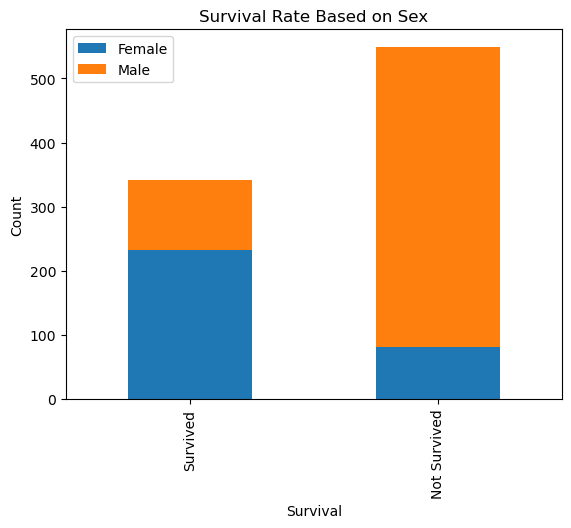

In [10]:
# Visualizing the survival rate based on sex
survived_sex = train_data[train_data['Survived'] == 1]['Sex'].value_counts()
not_survived_sex = train_data[train_data['Survived'] == 0]['Sex'].value_counts()
sex_df = pd.DataFrame([survived_sex, not_survived_sex])
sex_df.index = ['Survived', 'Not Survived']
sex_df.plot(kind='bar', stacked=True)
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survival Rate Based on Sex')
plt.legend(['Female', 'Male'])
plt.show()

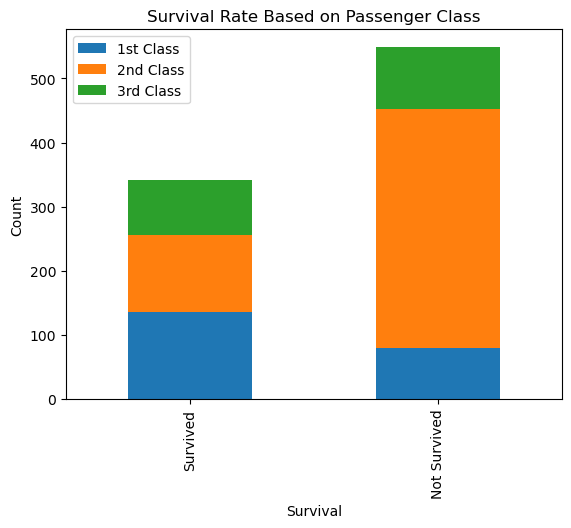

In [11]:
# Visualizing the survival rate based on passenger class
survived_class = train_data[train_data['Survived'] == 1]['Pclass'].value_counts()
not_survived_class = train_data[train_data['Survived'] == 0]['Pclass'].value_counts()
class_df = pd.DataFrame([survived_class, not_survived_class])
class_df.index = ['Survived', 'Not Survived']
class_df.plot(kind='bar', stacked=True)
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survival Rate Based on Passenger Class')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()


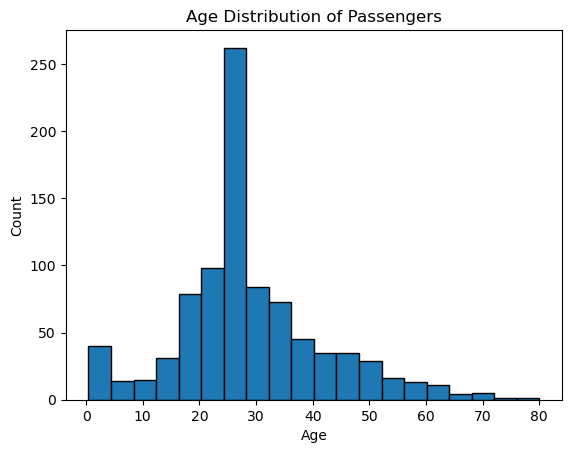

In [12]:
# Visualizing the age distribution of passengers
plt.hist(train_data['Age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Passengers')
plt.show()

In [13]:
# Split the dataset into features (X) and target (y)
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [14]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Verify the shapes of the train and test sets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (712, 7)
y_train shape: (712,)
x_test shape: (179, 7)
y_test shape: (179,)


In [16]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

## Naive Bayes Algorithm Implementation

In [17]:
def naive_bayes(x_train, y_train, x_test):
    # Separate the training data based on the class labels
    separated = {}
    for i in range(len(x_train)):
        features = x_train[i]
        label = y_train[i]
        if label not in separated:
            separated[label] = []
        separated[label].append(features)

    # Calculate the prior probabilities of each class
    priors = {}
    for label, instances in separated.items():
        priors[label] = len(instances) / len(x_train)

    # Calculate the likelihood probabilities for each feature given each class
    likelihoods = {}
    for label, instances in separated.items():
        likelihoods[label] = {}
        for i in range(len(instances[0])):
            column_values = [instance[i] for instance in instances]
            unique_values = set(column_values)
            likelihoods[label][i] = {}
            for value in unique_values:
                likelihoods[label][i][value] = column_values.count(value) / len(instances)

    # Calculate the posterior probabilities and make predictions on the test data
    predictions = []
    for features in x_test:
        posteriors = {}
        for label in separated:
            posterior = priors[label]
            for i in range(len(features)):
                value = features[i]
                if value in likelihoods[label][i]:
                    posterior *= likelihoods[label][i][value]
                else:
                    posterior = 0
                    break
            posteriors[label] = posterior
        predictions.append(max(posteriors, key=posteriors.get))

    return predictions


In [18]:
# Apply Naive Bayes algorithm
nb_predictions = naive_bayes(x_train.values, y_train.values, x_test.values)

## K-Nearest Neighbors (KNN) Algorithm Implementation

In [19]:
def k_nearest_neighbors(x_train, y_train, x_test, k):
    predictions = []  # List to store the predicted labels for test instances
    for test_instance in x_test:
        distances = []  # List to store the distances between the test instance and all training instances
        for i, train_instance in enumerate(x_train):
            # Calculate the Euclidean distance between the test instance and each training instance
            distance = np.sqrt(np.sum((test_instance - train_instance) ** 2))
            distances.append((i, distance))  # Store the index and distance as a tuple
        distances.sort(key=lambda x: x[1])  # Sort the distances in ascending order
        neighbors = [y_train[idx] for idx, _ in distances[:k]]  # Get the labels of the k nearest neighbors
        prediction = max(set(neighbors), key=neighbors.count)  # Make a prediction based on the majority vote of neighbors
        predictions.append(prediction)  # Add the prediction to the list of predictions
    return predictions


In [20]:
k = 5  # Define the value of K
knn_predictions = k_nearest_neighbors(x_train.values, y_train.values, x_test.values, k=5)



## Evaluating model performances

In [21]:
def evaluate(y_true, y_pred):
    correct = np.sum(y_true == y_pred)  # Count the number of correct predictions
    total = len(y_true)  # Total number of predictions
    accuracy = correct / total  # Calculate the accuracy
    return accuracy

In [22]:
# Using Naive Bayes
naive_bayes_accuracy = evaluate(y_test.values, nb_predictions)
print("Naive Bayes Accuracy:", naive_bayes_accuracy)

# Using k-Nearest Neighbors
knn_accuracy = evaluate(y_test.values, knn_predictions)
print("k-Nearest Neighbors Accuracy (k =", k, "):", knn_accuracy)



Naive Bayes Accuracy: 0.7262569832402235
k-Nearest Neighbors Accuracy (k = 5 ): 0.7150837988826816


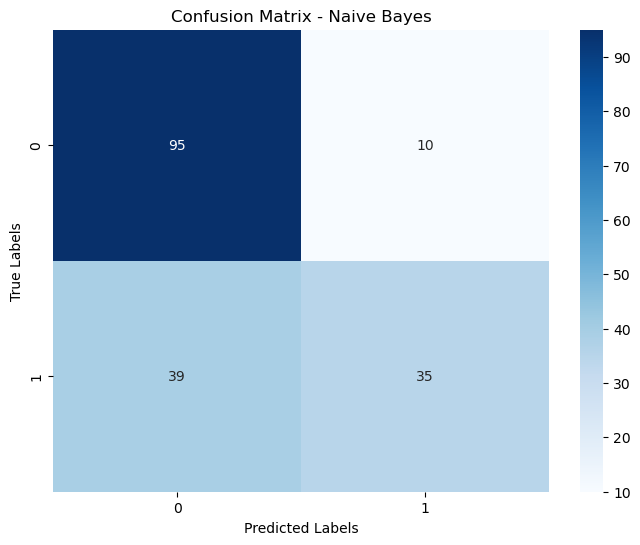

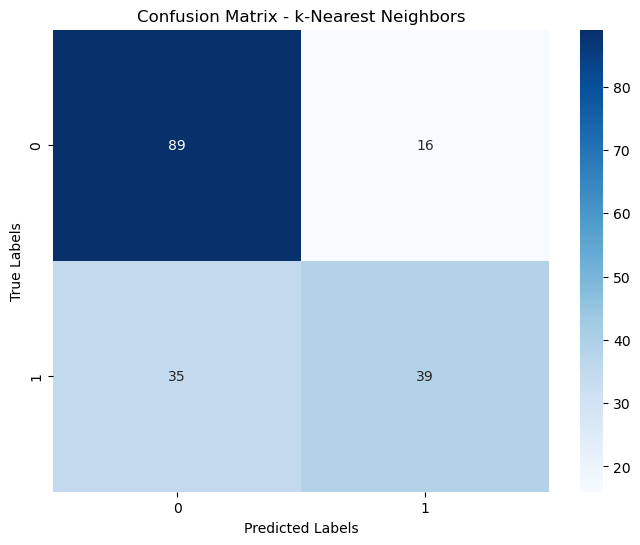

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix for Naive Bayes
nb_cm = confusion_matrix(y_test.values, nb_predictions)

# Plot the confusion matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Calculate the confusion matrix for k-Nearest Neighbors
knn_cm = confusion_matrix(y_test.values, knn_predictions)

# Plot the confusion matrix for k-Nearest Neighbors
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - k-Nearest Neighbors')
plt.show()


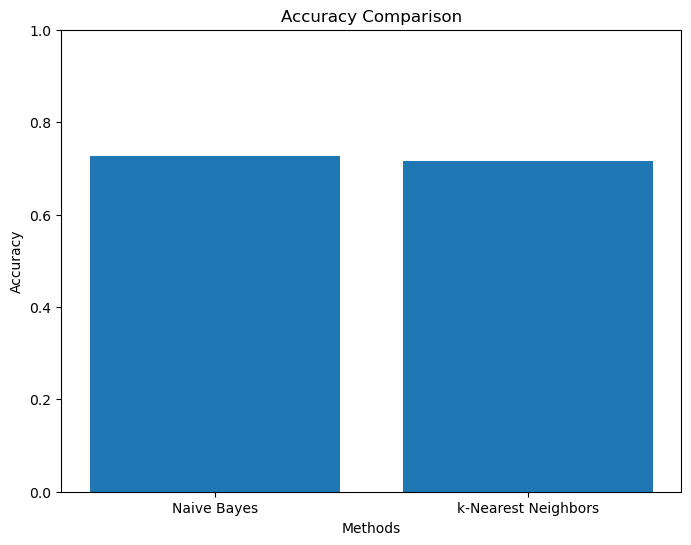

In [24]:
# Create a bar plot to compare accuracy
methods = ['Naive Bayes', 'k-Nearest Neighbors']
accuracies = [naive_bayes_accuracy, knn_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(methods, accuracies)
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis limits to ensure proper scale
plt.show()
